# Insurance Claims - Fraud Detection
## Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. IHS is in a unique position to help the Auto Insurance industry with this problem.

## Problem Statement:
Data is stored in different systems and its difficult to build analytics using multiple data sources. Copying data into a single platform is time consuming.

## Business solution:
Use S3 as a data lake to store different sources of data in a single platform. This allows data scientists / analysis to quickly analyze the data and generate reports to predict market trends and/or make financial decisions.

## Technical Solution:
Use Databricks as a single platform to pull various sources of data from API endpoints, or batch dumps into S3 for further processing. ETL the CSV datasets into efficient Parquet formats for performant processing.

In [1]:
# import lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings 
warnings.filterwarnings('ignore')

Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.

Plotly Express provides functions to visualize a variety of types of data. Most functions such as px.bar or px.scatter expect to operate on column-oriented data of the type you might store in a Pandas DataFrame (in either "long" or "wide" format, see below). px.imshow operates on matrix-like data you might store in a numpy or xarray array and functions like px.choropleth and px.choropleth_mapbox can operate on geographic data of the kind you might store in a GeoPandas GeoDataFrame. This page details how to provide column-oriented data to most Plotly Express functions

In [2]:
import plotly.express as px

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
plt.style.use('ggplot')

In [5]:
# import dataset
dataset = pd.read_csv(r'insurance_claims.csv')

In [6]:
dataset.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [7]:
# in dataset we can see '?' we need to replace it with Nan

dataset.replace("?",np.nan,inplace = True)

In [8]:
dataset.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                     NaN               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [9]:
dataset.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Data preprocessing

In [11]:
# missing values
dataset.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Visualize missing values

Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram.

In [12]:
import missingno as msno

<AxesSubplot: >

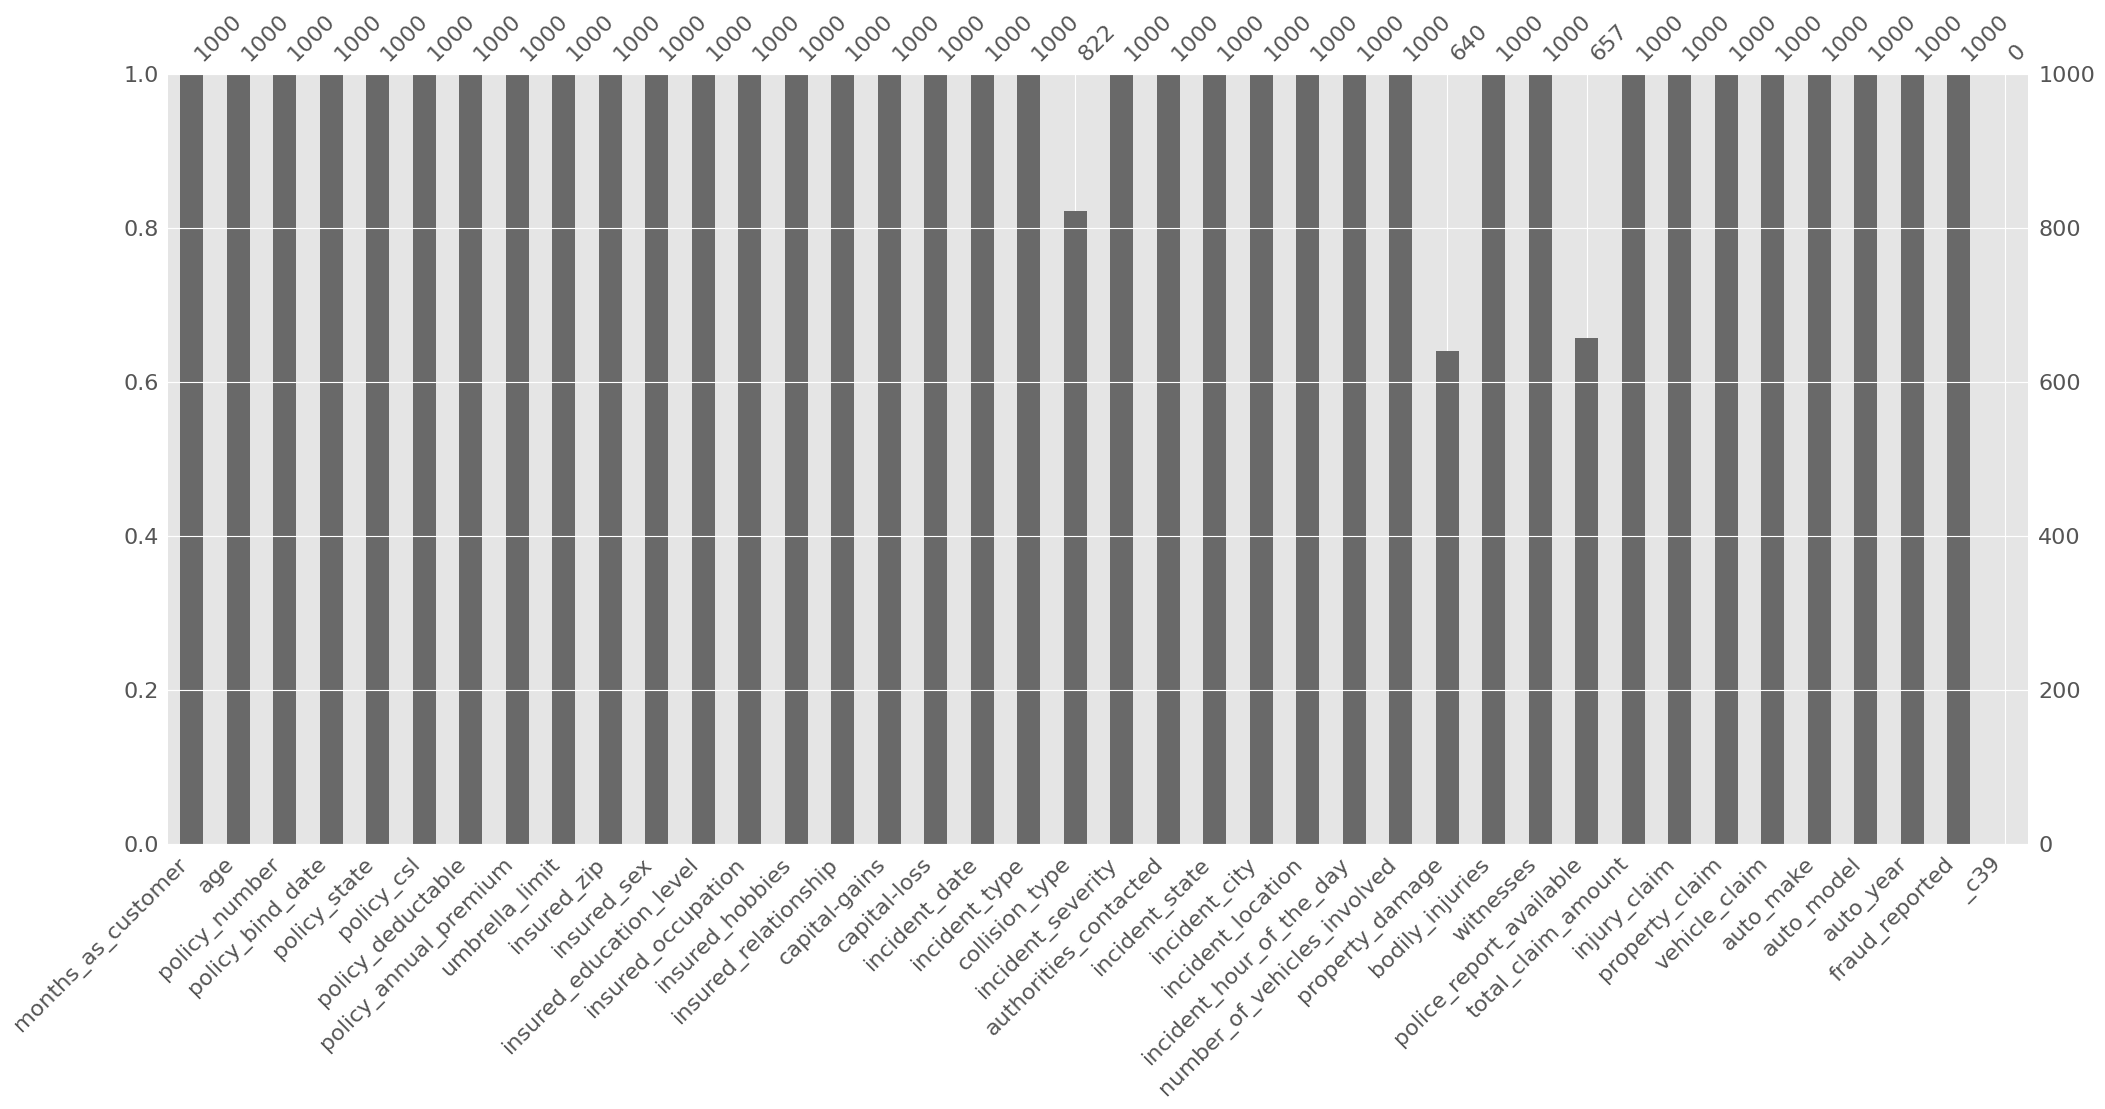

In [13]:
msno.bar(dataset)

In [14]:
# finding missing value precentage

missing_precentage = dataset.isnull().sum()*100/len(dataset)
missing_precentage

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                  17.8
incident_severity                0.0
authorities_contacted            0.0
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

In [15]:
# extract the columns having null_values
dataset.columns[dataset.isnull().any()]

Index(['collision_type', 'property_damage', 'police_report_available', '_c39'], dtype='object')

In [16]:
'''.mode()[0] will return the single value.. that is mode of features['Exterior1st'] And if you use only . 
mode().. you will get an error.. because mode() always returns a series regardless whether one value is returned.'''

dataset['collision_type'] = dataset['collision_type'].fillna(dataset['collision_type'].mode()[0])

In [17]:
dataset['property_damage'] = dataset['property_damage'].fillna(dataset['property_damage'].mode()[0])

In [18]:
dataset['police_report_available'] = dataset['police_report_available'].fillna(dataset['police_report_available'].mode()[0])

In [19]:
dataset.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# heatmap

<AxesSubplot: >

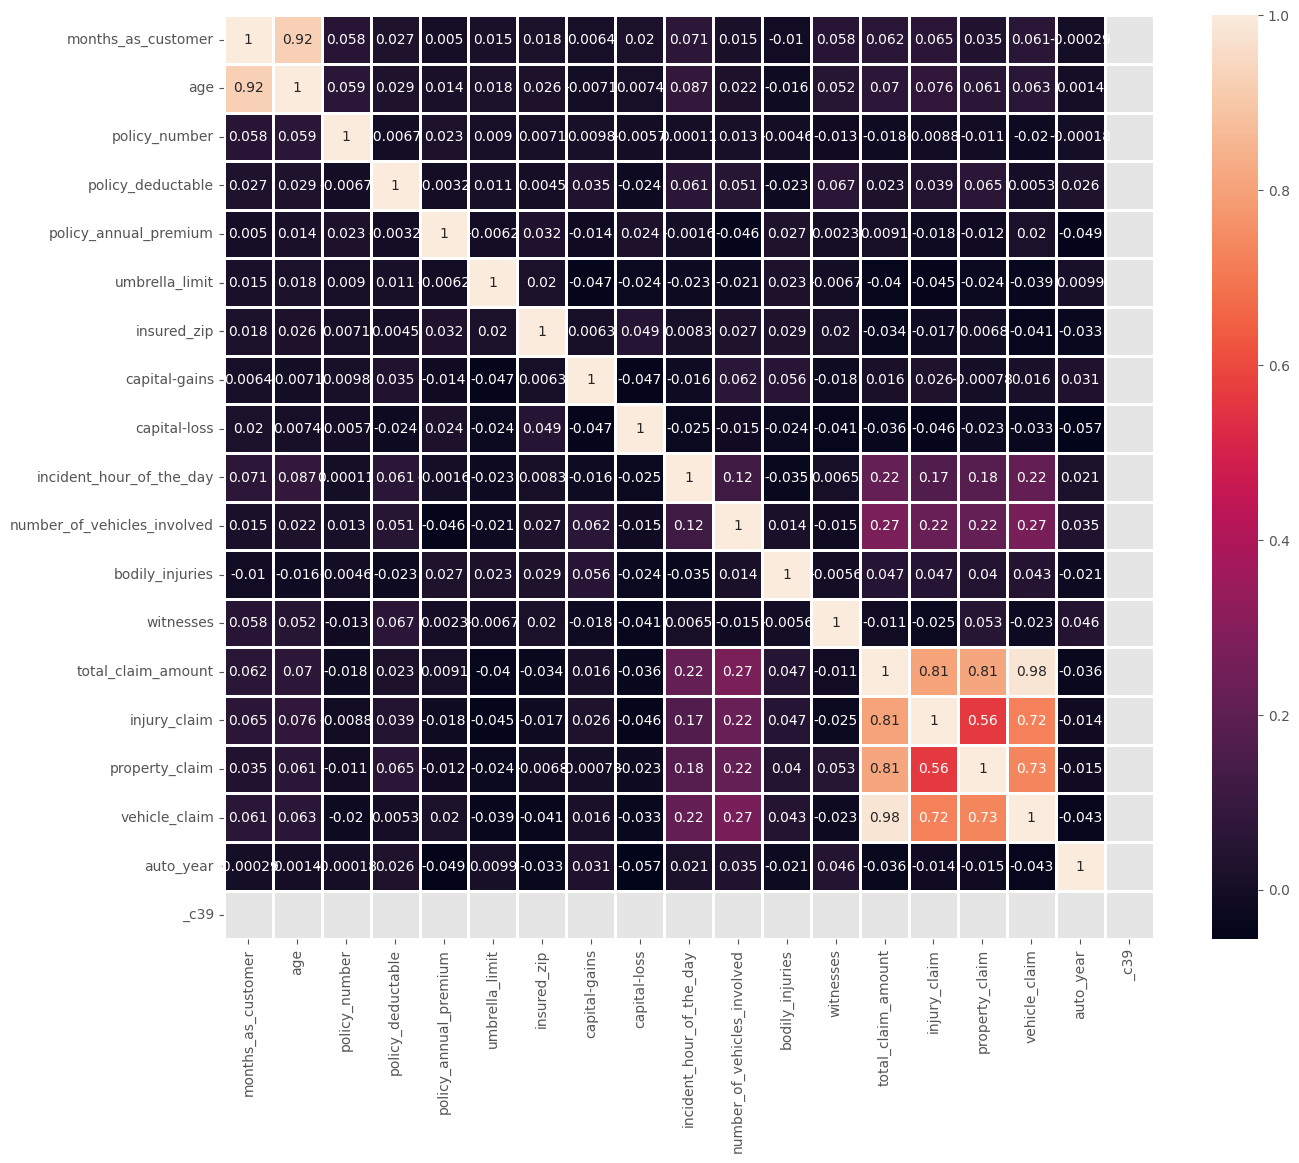

In [20]:
plt.figure(figsize=(15,12))
corr = dataset.corr()
sns.heatmap(data = corr , annot= True , fmt='.2g',linewidths=1)

The nunique() method returns the number of unique values for each column. 

In [21]:
dataset.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# multicollinearity:
## when the 2 feature are highly corelated more than 90% than we need to remove it 

In [22]:
# droping columns which are not necessary for prediction

In [23]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

In [24]:
dataset.drop(to_drop,axis='columns',inplace = True)

In [25]:
dataset.head()

months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_relationship  ...  number_of_vehicles_involved  \
0       craft-repair              husband  ...                            1   
1  machine-op-inspct       other-relative  ...                            1   
2              sales            own-child  ...                            3   
3       armed-forces            unmarried  ...                            1   
4              sales            unmarried  ...                            1   

   property_damage bodily_injuries witnesses police_report_available  \
0              YES               1         2                     YES   
1               NO               0         0                      NO   
2               NO               2         3                      NO   
3               NO               1         2                      NO   
4               NO               0         1                      NO   

  total_claim_amount  injury_claim  property_claim vehicle_claim  \
0              71610          6510           13020         52080   
1               5070           780             780          3510   
2              34650          7700            3850         23100   
3              63400          6340            6340         50720   
4               6500          1300             650          4550   

   fraud_reported  
0               Y  
1               Y  
2               N  
3               Y  
4               N  

[5 rows x 27 columns]

<AxesSubplot: >

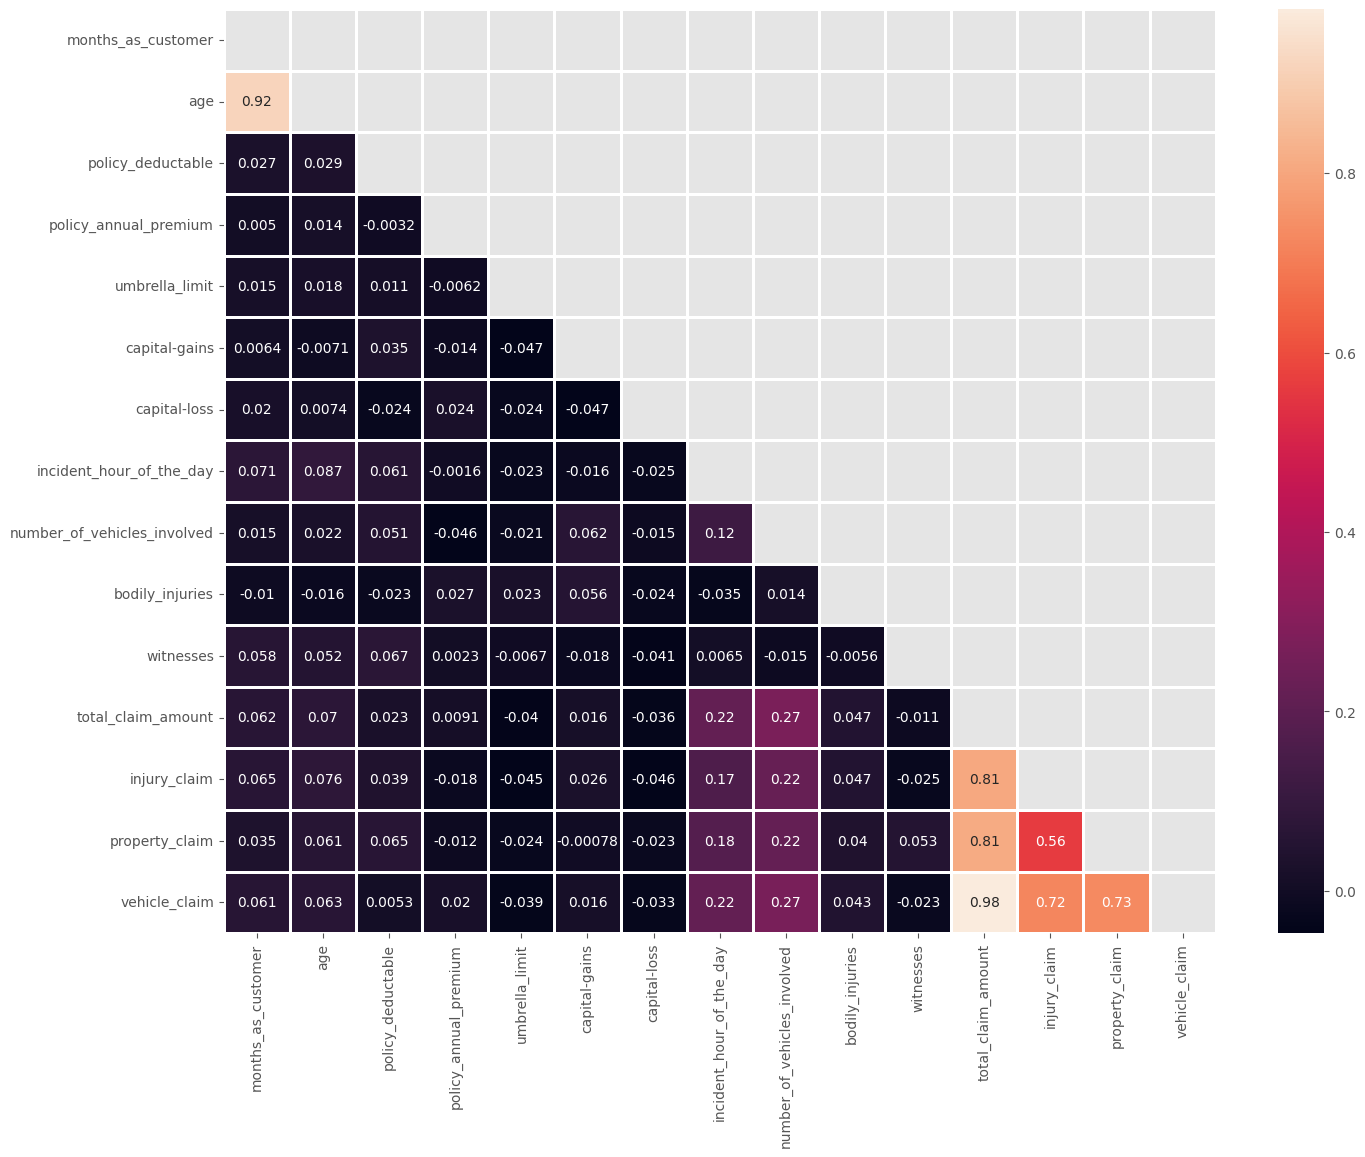

In [26]:
# checking multicollinearity
plt.figure(figsize=(16,12))

corr = dataset.corr()
'''numpy.triu(a, k = 0) : Returns copy of array with upper part of the triangle w.r.t k. Parameters : a : input array k : [int, optional, 0 by default]
Diagonal we require; k>0 means diagonal above main diagonal or vice versa. Returns : Upper triangle of a, having same shape and data-type as a.'''
'''ones_like() function is used to return an array of ones, 1 , with the same shape as a given array.'''

mask = np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(data = corr,mask = mask,annot = True,fmt = '.2g',linewidths=1)

From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [27]:
dataset.drop(columns=['age','total_claim_amount'],inplace = True,axis ='columns')

In [28]:
dataset.head()

months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 328    250/500               1000                1406.91   
1                 228    250/500               2000                1197.22   
2                 134    100/300               2000                1413.14   
3                 256    250/500               2000                1415.74   
4                 228   500/1000               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_relationship  capital-gains  ...  incident_hour_of_the_day  \
0              husband          53300  ...                         5   
1       other-relative              0  ...                         8   
2            own-child          35100  ...                         7   
3            unmarried          48900  ...                         5   
4            unmarried          66000  ...                        20   

  number_of_vehicles_involved property_damage bodily_injuries witnesses  \
0                           1             YES               1         2   
1                           1              NO               0         0   
2                           3              NO               2         3   
3                           1              NO               1         2   
4                           1              NO               0         1   

   police_report_available  injury_claim property_claim  vehicle_claim  \
0                      YES          6510          13020          52080   
1                       NO           780            780           3510   
2                       NO          7700           3850          23100   
3                       NO          6340           6340          50720   
4                       NO          1300            650           4550   

   fraud_reported  
0               Y  
1               Y  
2               N  
3               Y  
4               N  

[5 rows x 25 columns]

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [30]:
#seperating I.D/feature and Target Feature/Dependent variable.
X = dataset.drop('fraud_reported',axis = 'columns')
y = dataset['fraud_reported']

In [31]:
# we are getting error in Xgboost so we are trying this step
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
y = lr.fit_transform(y)

# Encoding catagorical variable

In [32]:
# exctraing catagorical columns
cat_data = X.select_dtypes(include=['object'])

In [33]:
print(cat_data.columns)
print(len(cat_data.columns))

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available'],
      dtype='object')
11


In [34]:
cat_data.head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_relationship             incident_type   collision_type  \
0              husband  Single Vehicle Collision   Side Collision   
1       other-relative             Vehicle Theft   Rear Collision   
2            own-child   Multi-vehicle Collision   Rear Collision   
3            unmarried  Single Vehicle Collision  Front Collision   
4            unmarried             Vehicle Theft   Rear Collision   

  incident_severity authorities_contacted property_damage  \
0      Major Damage                Police             YES   
1      Minor Damage                Police              NO   
2      Minor Damage                Police              NO   
3      Major Damage                Police              NO   
4      Minor Damage                  None              NO   

  police_report_available  
0                     YES  
1                      NO  
2                      NO  
3                      NO  
4                      NO

In [35]:
# printing unique values of each column:
# f is used for string
for col in cat_data.columns:
    print(f"{col}: \n{cat_data[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [36]:
cat_data = pd.get_dummies(cat_data,drop_first = True)

In [37]:
cat_data.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  ...  collision_type_Side Collision  \
0                                0  ...                              1   
1                                0  ...                              0   
2                                0  ...                              0   
3                                1  ...                              0   
4                                0  ...                              0   

   incident_severity_Minor Damage  incident_severity_Total Loss  \
0                               0                             0   
1                               1                             0   
2                               1                             0   
3                               0                             0   
4                               1                             0   

   incident_severity_Trivial Damage  authorities_contacted_Fire  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   authorities_contacted_None  authorities_contacted_Other  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           1                            0   

   authorities_contacted_Police  property_damage_YES  \
0                             1                    1   
1                             1                    0   
2                             1                    0   
3                             1                    0   
4                             0                    0   

   police_report_available_YES  
0                            1  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 41 columns]

In [38]:
#extcrating numerical values
num_data = X.select_dtypes(include=['int64'])

In [39]:
num_data.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
0                1          2          6510           13020          52080  
1                0          0           780             780           3510  
2                2          3          7700            3850          23100  
3                1          2          6340            6340          50720  
4                0          1          1300             650           4550

In [40]:
num_data.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [41]:
len(num_data.columns)

12

In [42]:
# now combining num and cat data togather in a dataframe
X = pd.concat([num_data,cat_data],axis = 1)

In [43]:
X.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  ...  \
0                1          2          6510  ...   
1                0          0           780  ...   
2                2          3          7700  ...   
3                1          2          6340  ...   
4                0          1          1300  ...   

   collision_type_Side Collision  incident_severity_Minor Damage  \
0                              1                               0   
1                              0                               1   
2                              0                               1   
3                              0                               0   
4                              0                               1   

   incident_severity_Total Loss  incident_severity_Trivial Damage  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   authorities_contacted_Fire  authorities_contacted_None  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   authorities_contacted_Other  authorities_contacted_Police  \
0                            0                             1   
1                            0                             1   
2                            0                             1   
3                            0                             1   
4                            0                             0   

   property_damage_YES  police_report_available_YES  
0                    1                            1  
1                    0                            0  
2                    0                            0  
3                    0                            0  
4                    0                            0  

[5 rows x 53 columns]

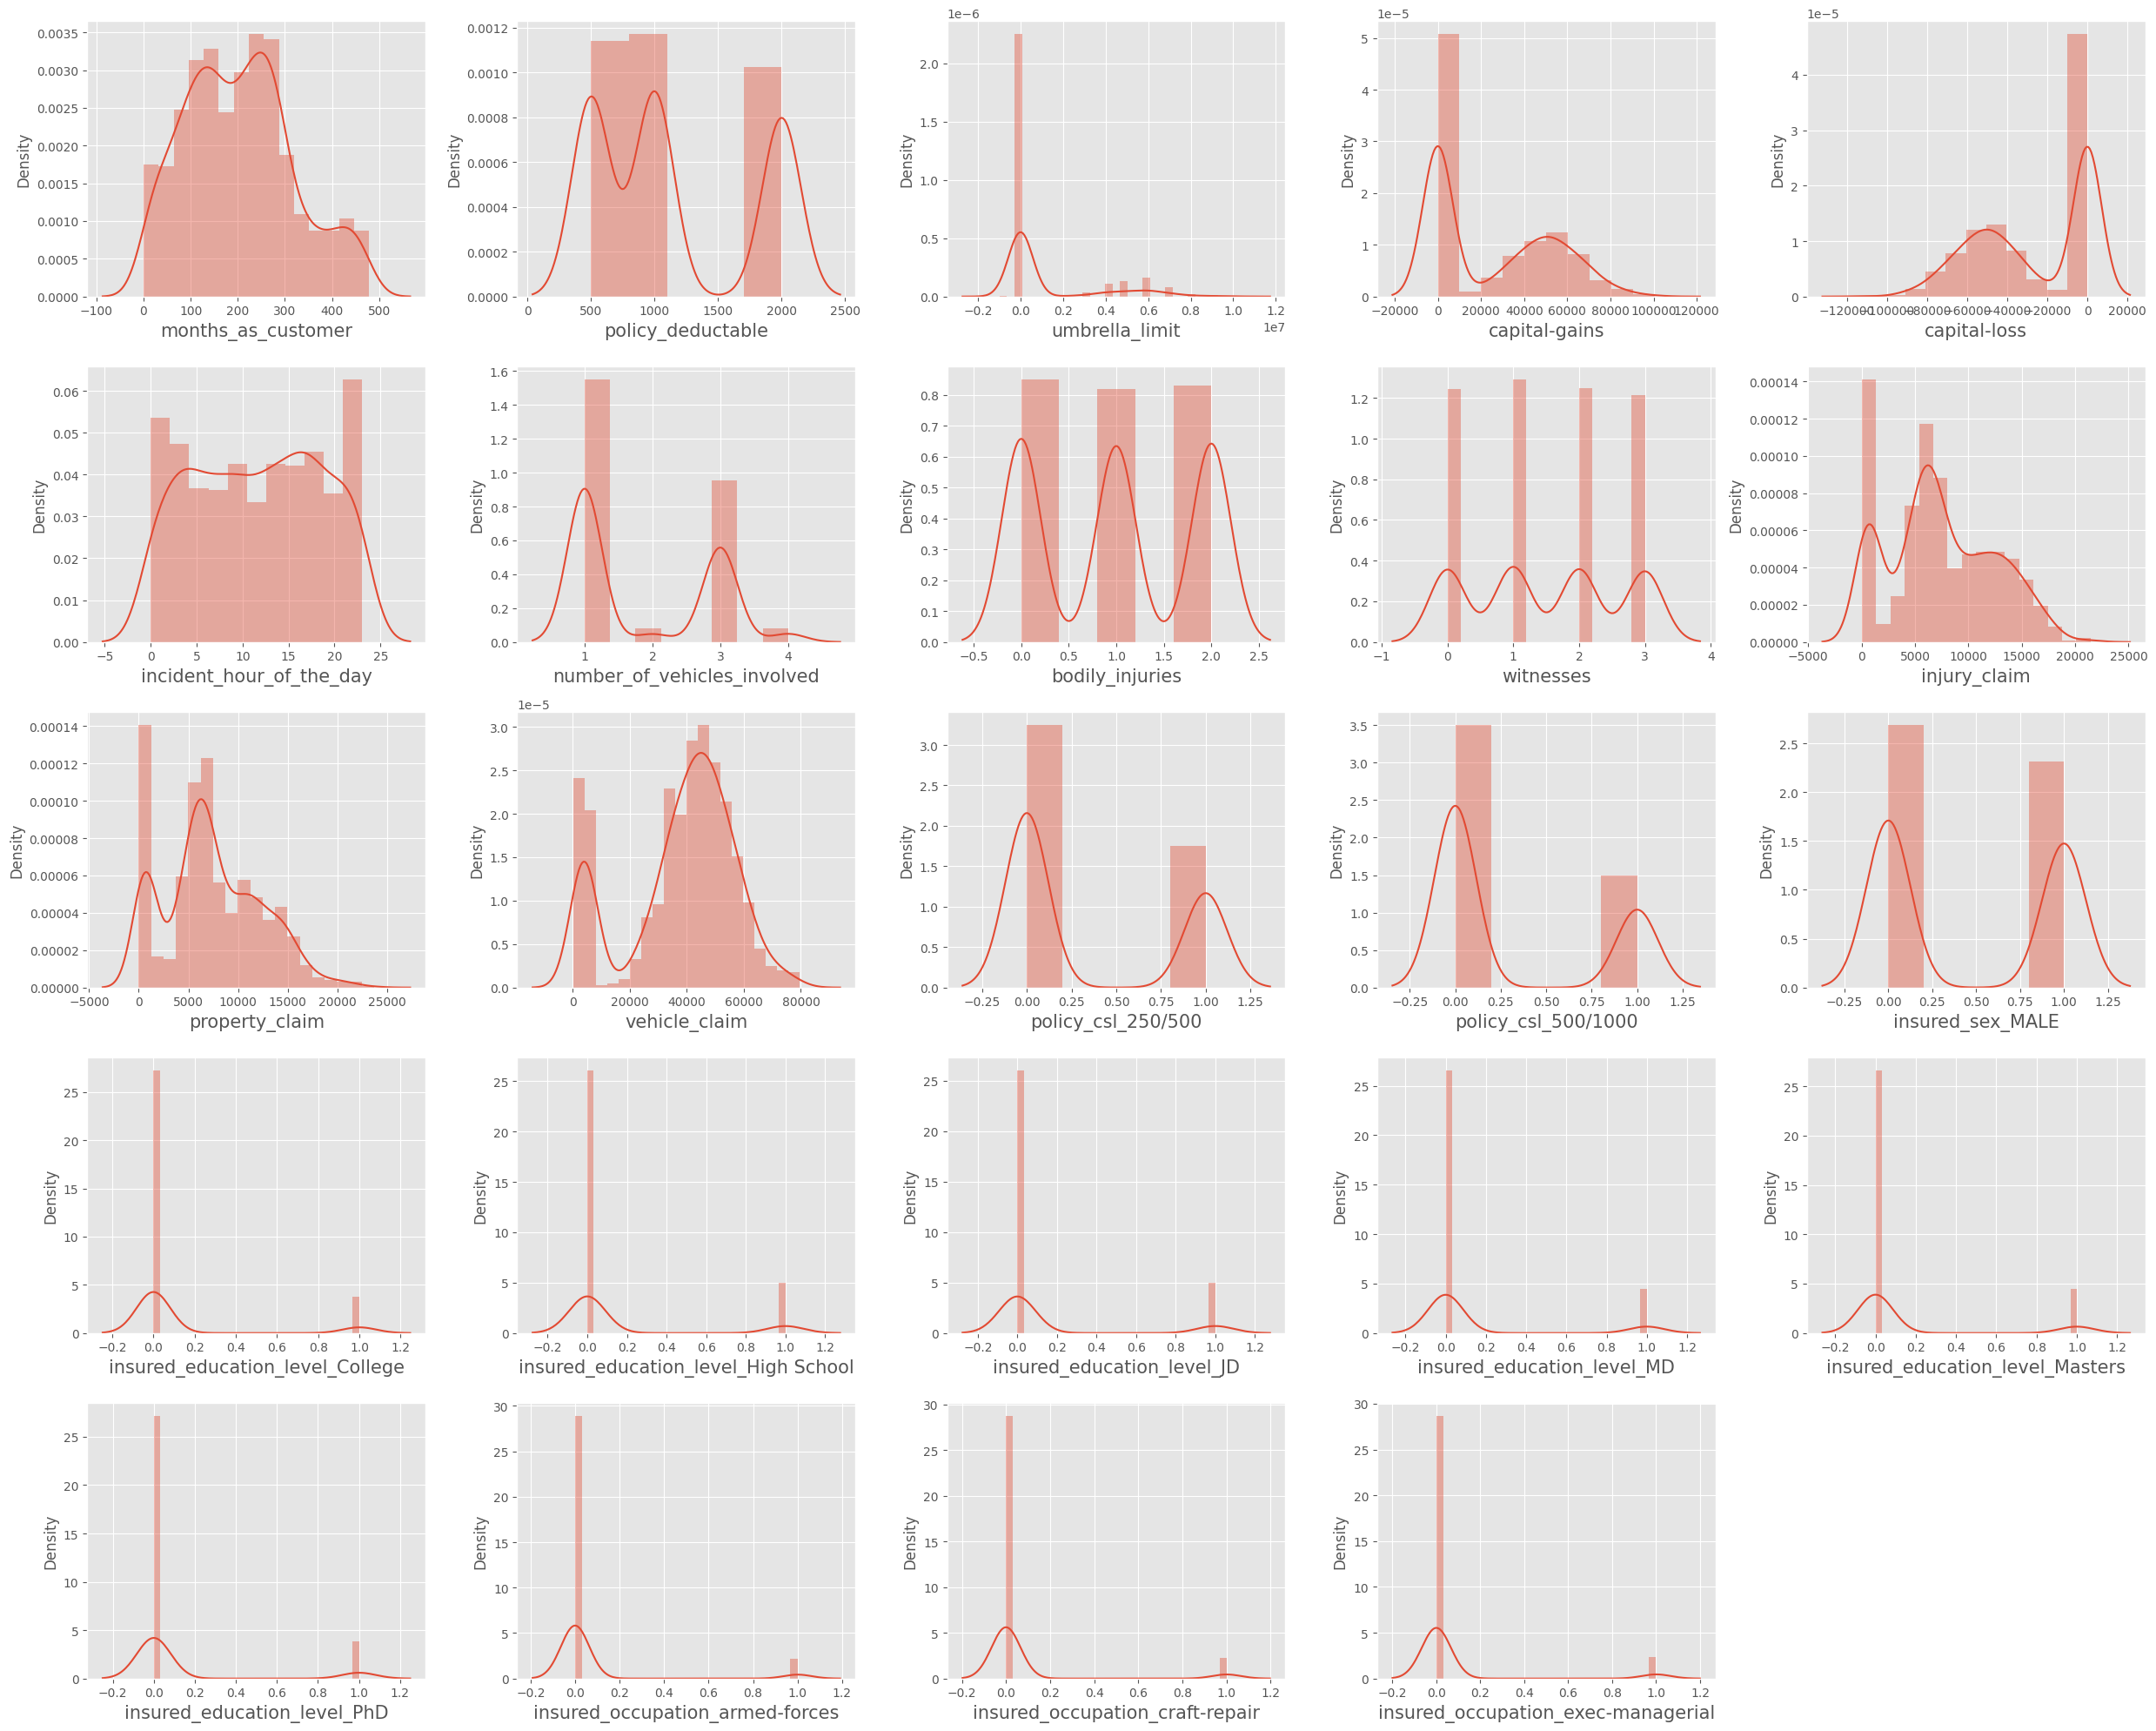

In [44]:
plt.figure(figsize=(25,20))
plotno = 1

for col in X.columns:
    if plotno <=24:
        ax = plt.subplot(5,5,plotno)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize = 15)
    plotno += 1

# Adjust the padding between and around subplots. To exclude an artist on the Axes from the bounding box calculation that determines the subplot parameters
plt.tight_layout()
plt.show()

data looks good ,let check for oulier

# Chekcing for outlier / Outlier Detection

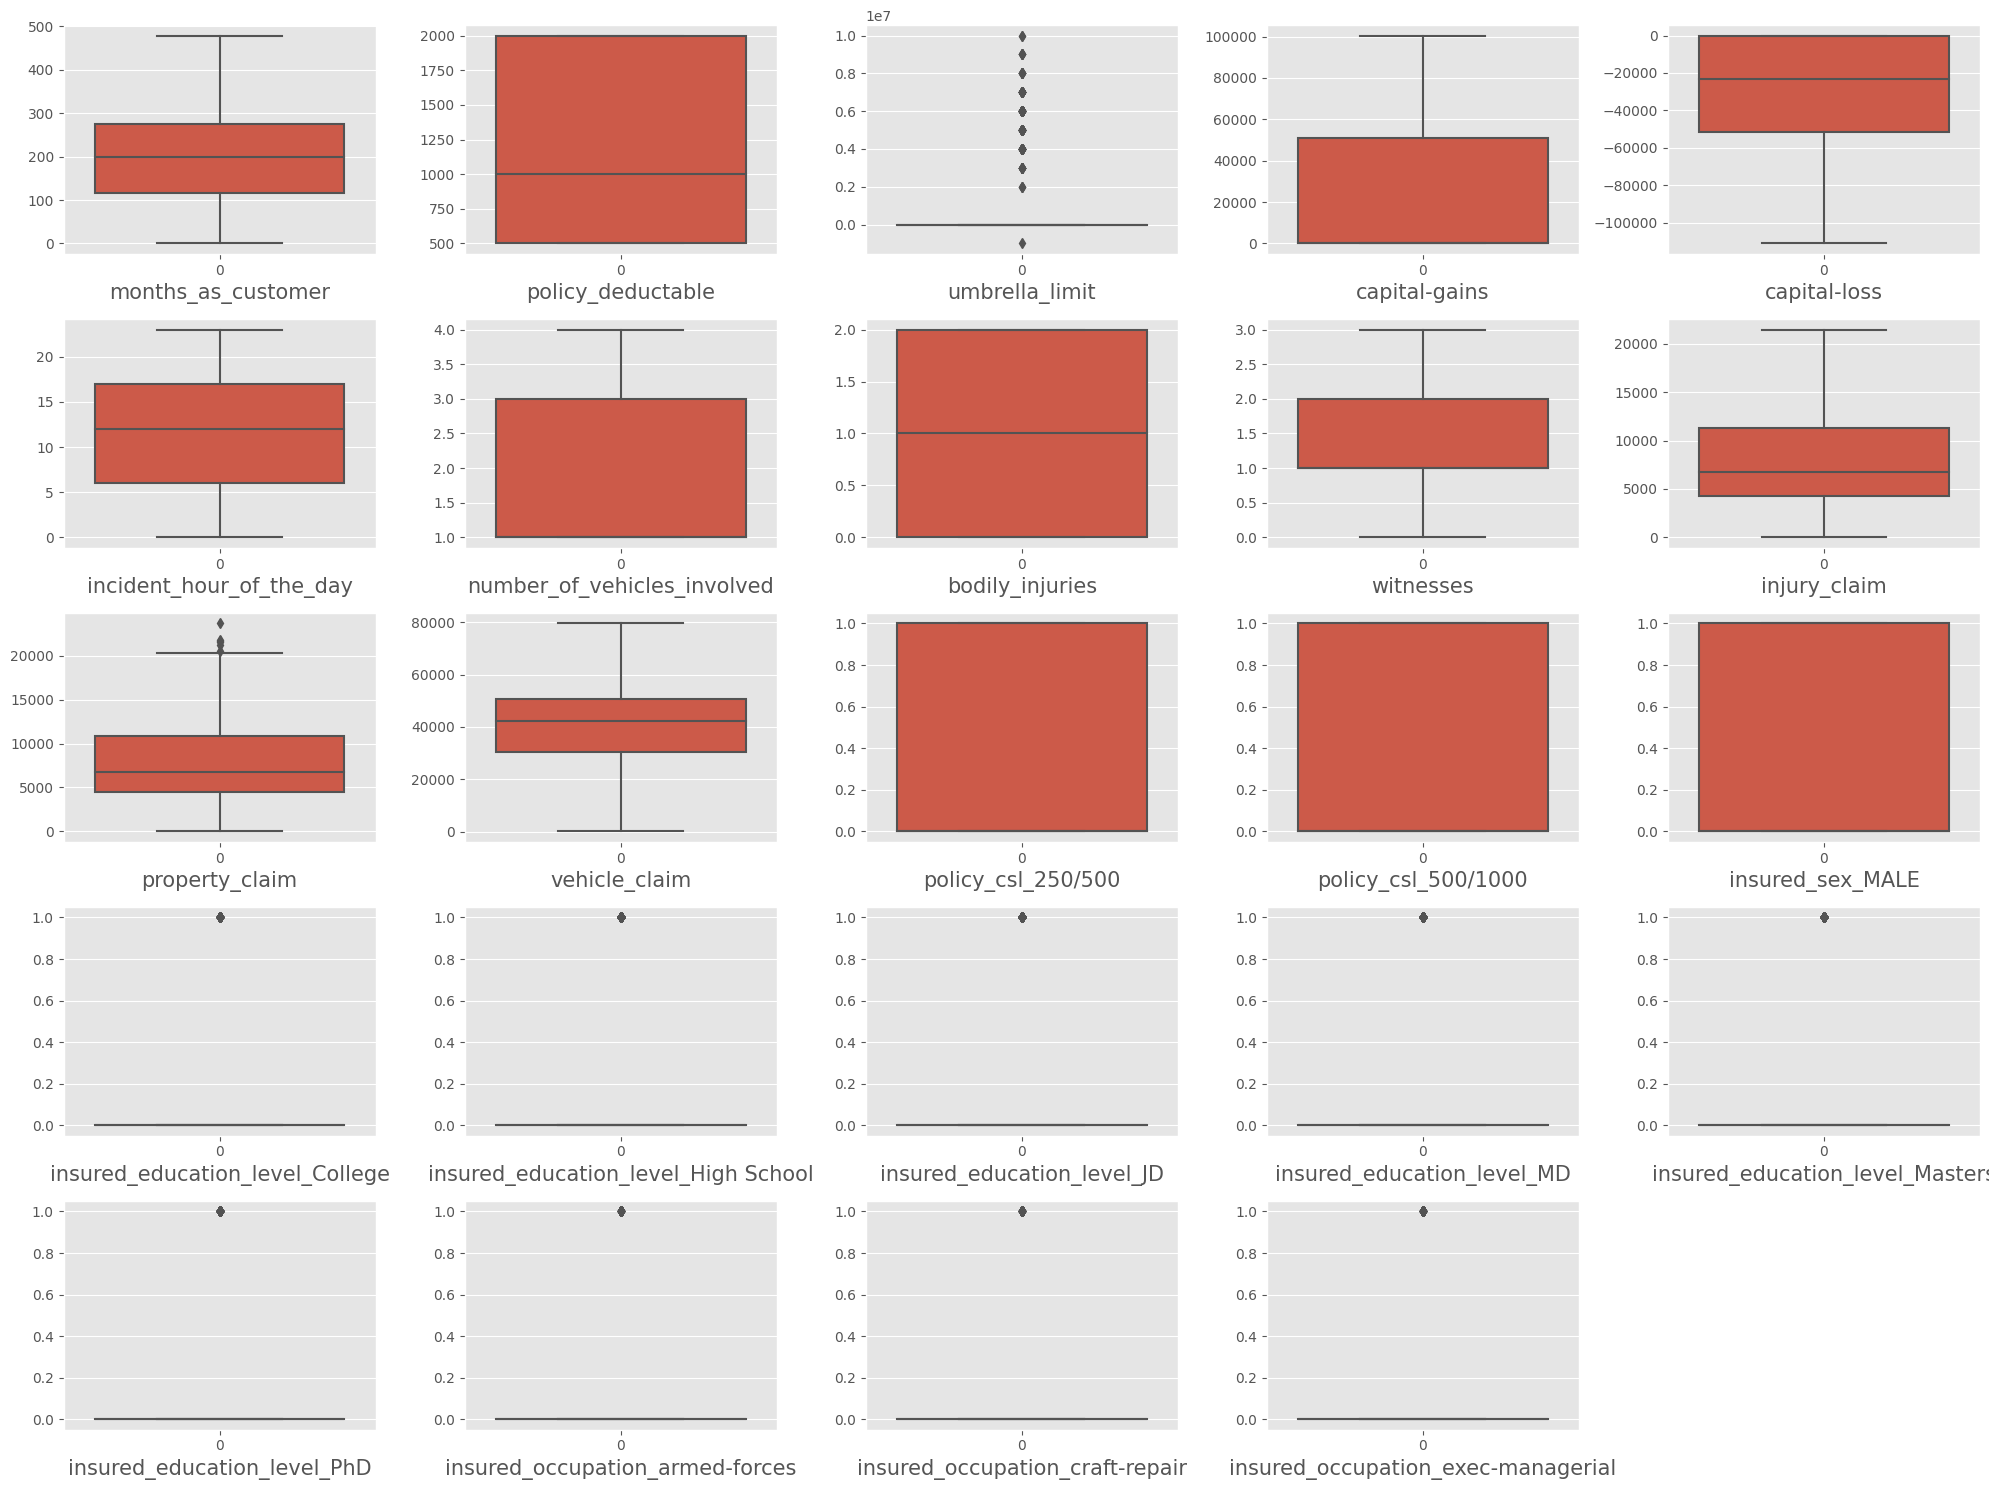

In [45]:
plt.figure(figsize=(20,15))
plotno = 1

for col in X.columns:
    if plotno <=24:
        ax = plt.subplot(5,5,plotno)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=15)
    plotno +=1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns latetr

In [46]:
# spliting the data into traning and test set
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state=0)

In [48]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
253                 440                500               0          41500   
667                 204               2000               0              0   
85                  275               2000               0          35700   
969                 398                500               0          69400   
75                  120               1000               0          78300   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
253        -70200                        21                            1   
667        -49300                         7                            1   
85              0                        13                            3   
969             0                         7                            1   
75              0                        22                            3   

     bodily_injuries  witnesses  injury_claim  ...  \
253                2          3          5960  ...   
667                1          1          4200  ...   
85                 0          1          5830  ...   
969                2          3           600  ...   
75                 2          0         11380  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
253                              1                               0   
667                              0                               0   
85                               0                               0   
969                              0                               0   
75                               0                               0   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
253                             0                                 0   
667                             1                                 0   
85                              0                                 0   
969                             0                                 1   
75                              1                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
253                           1                           0   
667                           0                           0   
85                            1                           0   
969                           0                           0   
75                            0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
253                            0                             0   
667                            0                             0   
85                             0                             0   
969                            0                             1   
75                             0                             0   

     property_damage_YES  police_report_available_YES  
253                    0                            0  
667                    1                            0  
85                     1                            0  
969                    0                            0  
75                     0                            0  

[5 rows x 53 columns]

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 253 to 684
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   months_as_customer                      750 non-null    int64
 1   policy_deductable                       750 non-null    int64
 2   umbrella_limit                          750 non-null    int64
 3   capital-gains                           750 non-null    int64
 4   capital-loss                            750 non-null    int64
 5   incident_hour_of_the_day                750 non-null    int64
 6   number_of_vehicles_involved             750 non-null    int64
 7   bodily_injuries                         750 non-null    int64
 8   witnesses                               750 non-null    int64
 9   injury_claim                            750 non-null    int64
 10  property_claim                          750 non-null    int64
 11  vehicle_claim    

In [50]:
# now seperating num variable from X_train
X_train_num_data = X_train.select_dtypes(include=["int64"])

In [51]:
X_train_num_data.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [52]:
X_train_num_data.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
253                 440                500               0          41500   
667                 204               2000               0              0   
85                  275               2000               0          35700   
969                 398                500               0          69400   
75                  120               1000               0          78300   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
253        -70200                        21                            1   
667        -49300                         7                            1   
85              0                        13                            3   
969             0                         7                            1   
75              0                        22                            3   

     bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
253                2          3          5960            5960          41720  
667                1          1          4200            8400          33600  
85                 0          1          5830           11660          40810  
969                2          3           600            1200           4800  
75                 2          0         11380            5690          34140

In [53]:
#now scaling the numerical of X_train 
from sklearn.preprocessing import StandardScaler

In [54]:
sclar = StandardScaler()

In [55]:
scaled_data = sclar.fit_transform(X_train_num_data)

In [56]:
scaled_num_data = pd.DataFrame(data = scaled_data, columns = X_train_num_data.columns, index = X_train.index)

In [57]:
scaled_num_data.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
253            2.012747          -1.022231       -0.495177       0.560692   
667           -0.018986           1.435055       -0.495177      -0.914177   
85             0.592256           1.435055       -0.495177       0.354566   
969            1.651167          -1.022231       -0.495177       1.552231   
75            -0.742145          -0.203136       -0.495177       1.868528   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
253     -1.530640                  1.302118                    -0.825992   
667     -0.793281                 -0.684837                    -0.825992   
85       0.946040                  0.166715                     1.137539   
969      0.946040                 -0.684837                    -0.825992   
75       0.946040                  1.444044                     1.137539   

     bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
253         1.229008   1.327686     -0.302435       -0.314499       0.183090  
667         0.016171  -0.453646     -0.666545        0.195020      -0.250726  
85         -1.196666  -0.453646     -0.329329        0.875771       0.134473  
969         1.229008   1.327686     -1.411315       -1.308478      -1.789385  
75          1.229008  -1.344312      0.818858       -0.370880      -0.221876

In [58]:
# we remove the column name from scaled data
X_train.drop(columns = scaled_num_data,inplace = True)

In [59]:
# then we concat both the data
X_train = pd.concat([scaled_num_data,X_train],axis = 1)

In [60]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
253            2.012747          -1.022231       -0.495177       0.560692   
667           -0.018986           1.435055       -0.495177      -0.914177   
85             0.592256           1.435055       -0.495177       0.354566   
969            1.651167          -1.022231       -0.495177       1.552231   
75            -0.742145          -0.203136       -0.495177       1.868528   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
253     -1.530640                  1.302118                    -0.825992   
667     -0.793281                 -0.684837                    -0.825992   
85       0.946040                  0.166715                     1.137539   
969      0.946040                 -0.684837                    -0.825992   
75       0.946040                  1.444044                     1.137539   

     bodily_injuries  witnesses  injury_claim  ...  \
253         1.229008   1.327686     -0.302435  ...   
667         0.016171  -0.453646     -0.666545  ...   
85         -1.196666  -0.453646     -0.329329  ...   
969         1.229008   1.327686     -1.411315  ...   
75          1.229008  -1.344312      0.818858  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
253                              1                               0   
667                              0                               0   
85                               0                               0   
969                              0                               0   
75                               0                               0   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
253                             0                                 0   
667                             1                                 0   
85                              0                                 0   
969                             0                                 1   
75                              1                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
253                           1                           0   
667                           0                           0   
85                            1                           0   
969                           0                           0   
75                            0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
253                            0                             0   
667                            0                             0   
85                             0                             0   
969                            0                             1   
75                             0                             0   

     property_damage_YES  police_report_available_YES  
253                    0                            0  
667                    1                            0  
85                     1                            0  
969                    0                            0  
75                     0                            0  

[5 rows x 53 columns]

#  Models

# SVM Support vector machine(classfier)

In [61]:
from sklearn.svm import SVC

In [62]:
svc = SVC()
svc.fit(X_train,y_train)
svm_y_pred = svc.predict(X_test)

In [63]:
# now checking accuracy score ,confusion matrix,classification_report

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [64]:
svc_ac = accuracy_score
svc_cm = confusion_matrix
svc_cr = classification_report

In [65]:
svc_train_score = svc_ac(y_train,svc.predict(X_train))
svc_test_score = svc_ac(y_test,svm_y_pred)

print("Accuracy of train set with SVC : {}".format(svc_train_score))
print("Accuracy of test set with SVC : {}".format(svc_test_score))
print()
print("congusion matrix with SVC :\n\n",svc_cm(y_test,svm_y_pred))
print()
print("Classification report with SVC : \n\n",svc_cr(y_test,svm_y_pred))

Accuracy of train set with SVC : 0.8506666666666667
Accuracy of test set with SVC : 0.72

congusion matrix with SVC :

 [[180   0]
 [ 70   0]]

Classification report with SVC : 

               precision    recall  f1-score   support

           0       0.72      1.00      0.84       180
           1       0.00      0.00      0.00        70

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.60       250



# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=30)

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [69]:
knn_y_pred = knn.predict(X_test)

In [70]:
# now checking accuracy score ,confusion matrix,classification_report
knn_ac = accuracy_score
knn_cm = confusion_matrix
knn_cr = classification_report

In [71]:
knn_train_score = knn_ac(y_train,knn.predict(X_train))
knn_test_score = knn_ac(y_test,knn_y_pred)


In [72]:

print("Accuracy of train set with KNN : {}".format(knn_train_score))
print("Accuracy of test set with KNN : {}".format(knn_test_score))
print()
print("congusion matrix with KNN :\n\n",knn_cm(y_test,knn_y_pred))
print()
print("Classification report with KNN : \n\n",knn_cr(y_test,knn_y_pred))

Accuracy of train set with KNN : 0.7666666666666667
Accuracy of test set with KNN : 0.72

congusion matrix with KNN :

 [[180   0]
 [ 70   0]]

Classification report with KNN : 

               precision    recall  f1-score   support

           0       0.72      1.00      0.84       180
           1       0.00      0.00      0.00        70

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.60       250



# Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dr = DecisionTreeClassifier()

In [75]:
dr.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
dr_y_pred = dr.predict(X_test) 

In [77]:
# now checking accuracy score ,confusion matrix,classification_report
dr_ac = accuracy_score
dr_cm = confusion_matrix
dr_cr = classification_report

dr_train_score = dr_ac(y_train,dr.predict(X_train))
dr_test_score = dr_ac(y_test,dr_y_pred)

In [78]:

print("Accuracy of train set with Decision tree classifier : {}".format(dr_train_score))
print("Accuracy of test set with Decision tree classifier : {}".format(dr_test_score))
print()
print("congusion matrix with Decision tree classifier :\n\n",dr_cm(y_test,dr_y_pred))
print()
print("Classification report with Decision tree classifier : \n\n",dr_cr(y_test,dr_y_pred))

Accuracy of train set with Decision tree classifier : 1.0
Accuracy of test set with Decision tree classifier : 0.584

congusion matrix with Decision tree classifier :

 [[90 90]
 [14 56]]

Classification report with Decision tree classifier : 

               precision    recall  f1-score   support

           0       0.87      0.50      0.63       180
           1       0.38      0.80      0.52        70

    accuracy                           0.58       250
   macro avg       0.62      0.65      0.58       250
weighted avg       0.73      0.58      0.60       250



GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

In [79]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [80]:
gr = GridSearchCV

In [81]:
# traking dr parameter 
depth = [3,5,7,10]
grid_params = {
    'criterion':["gini", "entropy"],
    'max_depth':depth,
    'min_samples_split': range(2,10,1),
    'min_samples_leaf' : range(2,10,1)
}
grid_search = GridSearchCV(dr,grid_params,cv=5,n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [82]:
#best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 3}
0.8119999999999999


In [83]:
# best estimator
dr_ = grid_search.best_estimator_

In [84]:
dr__y_pred = dr_.predict(X_test)

In [85]:
# accuracy_score, confusion_matrix and classification_report
dr__ac = accuracy_score
dr__cm = confusion_matrix
dr__cr = classification_report

In [86]:
dr__train_score = dr__ac(y_train,dr_.predict(X_train))
dr__test_score = dr__ac(y_test,dr__y_pred)

In [87]:
print("Accuracy of train set with Decision tree classifier with gridsearch : {}".format(dr__train_score))
print("Accuracy of test set with Decision tree classifier with gridsearch : {}".format(dr__test_score))
print()
print("congusion matrix with Decision tree classifier with gridsearch :\n\n",dr_cm(y_test,dr__y_pred))
print()
print("Classification report with Decision tree classifier with gridsearch : \n\n",dr_cr(y_test,dr__y_pred))

Accuracy of train set with Decision tree classifier with gridsearch : 0.82
Accuracy of test set with Decision tree classifier with gridsearch : 0.812

congusion matrix with Decision tree classifier with gridsearch :

 [[157  23]
 [ 24  46]]

Classification report with Decision tree classifier with gridsearch : 

               precision    recall  f1-score   support

           0       0.87      0.87      0.87       180
           1       0.67      0.66      0.66        70

    accuracy                           0.81       250
   macro avg       0.77      0.76      0.77       250
weighted avg       0.81      0.81      0.81       250



# Random forest Clssifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)

In [89]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=3, n_estimators=140)

In [90]:
rf_y_pred = rf.predict(X_test)

In [91]:
# accuracy_score, confusion_matrix and classification_report
rf_train_score = accuracy_score(rf.predict(X_train),y_train)
rf_test_score = accuracy_score(y_test,rf_y_pred)

In [92]:
print("Accuracy of train set with Decision tree classifier with gridsearch : {}".format(rf_train_score))
print("Accuracy of test set with Decision tree classifier with gridsearch : {}".format(rf_test_score))
print()
print("confusion matrix with Decision tree classifier with gridsearch :\n\n",confusion_matrix(y_test,rf_y_pred))
print()
print("Classification report with Decision tree classifier with gridsearch : \n\n",classification_report(y_test,rf_y_pred))

Accuracy of train set with Decision tree classifier with gridsearch : 0.9733333333333334
Accuracy of test set with Decision tree classifier with gridsearch : 0.728

confusion matrix with Decision tree classifier with gridsearch :

 [[170  10]
 [ 58  12]]

Classification report with Decision tree classifier with gridsearch : 

               precision    recall  f1-score   support

           0       0.75      0.94      0.83       180
           1       0.55      0.17      0.26        70

    accuracy                           0.73       250
   macro avg       0.65      0.56      0.55       250
weighted avg       0.69      0.73      0.67       250



# Ada Boost Classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator = dr_)

In [94]:
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [95]:
grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=8,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [96]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 180}
0.8093333333333333


In [97]:
# best estimator 

ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

In [98]:
ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)
print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.824
Test accuracy of Ada Boost is : 0.744
[[138  42]
 [ 22  48]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       180
           1       0.53      0.69      0.60        70

    accuracy                           0.74       250
   macro avg       0.70      0.73      0.71       250
weighted avg       0.77      0.74      0.75       250



# Gradient Bossting classifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [100]:
# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.928
Test Accuracy of Gradient Boosting Classifier is 0.644 

Confusion Matrix :- 
[[122  58]
 [ 31  39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73       180
           1       0.40      0.56      0.47        70

    accuracy                           0.64       250
   macro avg       0.60      0.62      0.60       250
weighted avg       0.69      0.64      0.66       250



# Stochastic Gradient Boosting (SGB)

In [101]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, subsample=0.9)

In [102]:
# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.94
Test Accuracy of Stochastic Gradient Boosting is 0.408 

Confusion Matrix :- 
[[ 38 142]
 [  6  64]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.21      0.34       180
           1       0.31      0.91      0.46        70

    accuracy                           0.41       250
   macro avg       0.59      0.56      0.40       250
weighted avg       0.71      0.41      0.37       250



# XgBoost Classifier

In [104]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
#------------------------------------------****--------------------------------------------------------------------
'''#this code is to solve error Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['N' 'Y']
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
xgb_y_train = lr.fit_transform(y_train)'''
#------------------------------------------****--------------------------------------------------------------------
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [105]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.64
[[115  65]
 [ 25  45]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       180
           1       0.41      0.64      0.50        70

    accuracy                           0.64       250
   macro avg       0.62      0.64      0.61       250
weighted avg       0.71      0.64      0.66       250



In [106]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=8,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [107]:
# best estimator 

xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

In [108]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.824
Test accuracy of XgBoost is : 0.744
[[138  42]
 [ 22  48]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       180
           1       0.53      0.69      0.60        70

    accuracy                           0.74       250
   macro avg       0.70      0.73      0.71       250
weighted avg       0.77      0.74      0.75       250



# Cat Boost Classifier

In [113]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5453091	total: 140ms	remaining: 1.26s
1:	learn: 0.4278525	total: 143ms	remaining: 574ms
2:	learn: 0.4043838	total: 147ms	remaining: 342ms
3:	learn: 0.3840468	total: 151ms	remaining: 226ms
4:	learn: 0.3489635	total: 154ms	remaining: 154ms
5:	learn: 0.3345956	total: 157ms	remaining: 105ms
6:	learn: 0.3042329	total: 160ms	remaining: 68.8ms
7:	learn: 0.2885738	total: 165ms	remaining: 41.2ms
8:	learn: 0.2810884	total: 168ms	remaining: 18.7ms
9:	learn: 0.2677621	total: 171ms	remaining: 0us


In [114]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")


Training Accuracy of Cat Boost Classifier is 0.9106666666666666
Test Accuracy of Cat Boost Classifier is 0.688 

Confusion Matrix :- 
[[156  24]
 [ 54  16]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       180
           1       0.40      0.23      0.29        70

    accuracy                           0.69       250
   macro avg       0.57      0.55      0.55       250
weighted avg       0.65      0.69      0.66       250



# Extra Trees Classifier

In [115]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.748 

Confusion Matrix :- 
[[161  19]
 [ 44  26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       180
           1       0.58      0.37      0.45        70

    accuracy                           0.75       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.73      0.75      0.73       250



# LGBM Classifier

In [117]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.708 

[[143  37]
 [ 36  34]]

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       180
           1       0.48      0.49      0.48        70

    accuracy                           0.71       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.71      0.71      0.71       250



# Voting Classifier

In [118]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dr_), ('Random Forest', rf),
               ('Ada Boost', ada), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc), ('LGBM', lgbm)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.5453091	total: 4.36ms	remaining: 39.2ms
1:	learn: 0.4278525	total: 7.89ms	remaining: 31.6ms
2:	learn: 0.4043838	total: 11.4ms	remaining: 26.5ms
3:	learn: 0.3840468	total: 14.3ms	remaining: 21.4ms
4:	learn: 0.3489635	total: 17.9ms	remaining: 17.9ms
5:	learn: 0.3345956	total: 21.2ms	remaining: 14.1ms
6:	learn: 0.3042329	total: 24.4ms	remaining: 10.5ms
7:	learn: 0.2885738	total: 27.4ms	remaining: 6.85ms
8:	learn: 0.2810884	total: 30.7ms	remaining: 3.41ms
9:	learn: 0.2677621	total: 34ms	remaining: 0us


In [119]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.9293333333333333
Test accuracy of Voting Classifier is : 0.776
[[154  26]
 [ 30  40]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       180
           1       0.61      0.57      0.59        70

    accuracy                           0.78       250
   macro avg       0.72      0.71      0.72       250
weighted avg       0.77      0.78      0.77       250



# Models Comparison

In [124]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'LGBM', 'XgBoost', 'Voting Classifier'],
    'Score' : [svc_test_score, knn_test_score, dr__test_score, rf_test_score, ada_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, lgbm_acc, xgb_test_acc, vc_test_acc]
})

In [125]:
models.sort_values(by = 'Score', ascending = False)

Model  Score
2       Decision Tree  0.812
11  Voting Classifier  0.776
8         Extra Trees  0.748
4           Ada Boost  0.744
10            XgBoost  0.744
3       Random Forest  0.728
0                 SVC  0.720
1                 KNN  0.720
9                LGBM  0.708
7           Cat Boost  0.688
5      Gradient Boost  0.644
6                 SGB  0.408

In [126]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')


# Conclusion :
### we can go for decission tree model because it gives us highest accuracy